<a href="https://colab.research.google.com/github/renukaparimi-code/Ai-ml-projects/blob/main/Titanicdataday2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset[1].csv to Titanic-Dataset[1] (2).csv
Uploaded: Titanic-Dataset[1] (2).csv
Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292



--- Name (unique=891) ---
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
Moran, Mr. James                                       1
McCarthy, Mr. Timothy J                                1
Palsson, Master. Gosta Leonard                         1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      1
Name: count, dtype: int64

--- Sex (unique=2) ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Ticket (unique=681) ---
Ticket
347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
113760          4
19950           4
Name: count, dtype: int64

--- Cabin (unique=147) ---
Cabin
NaN           

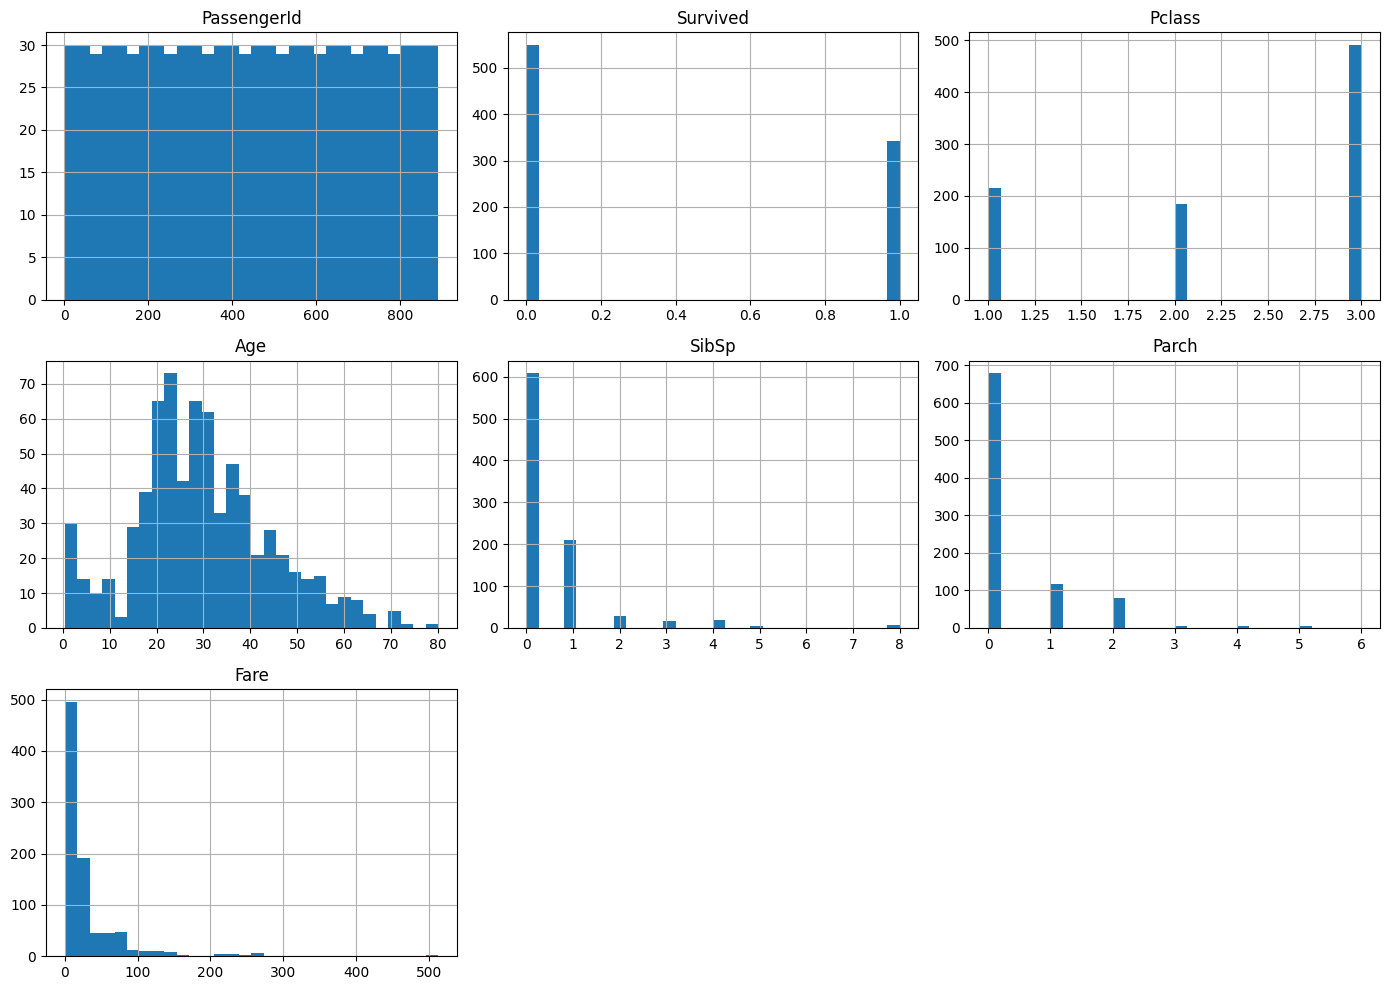

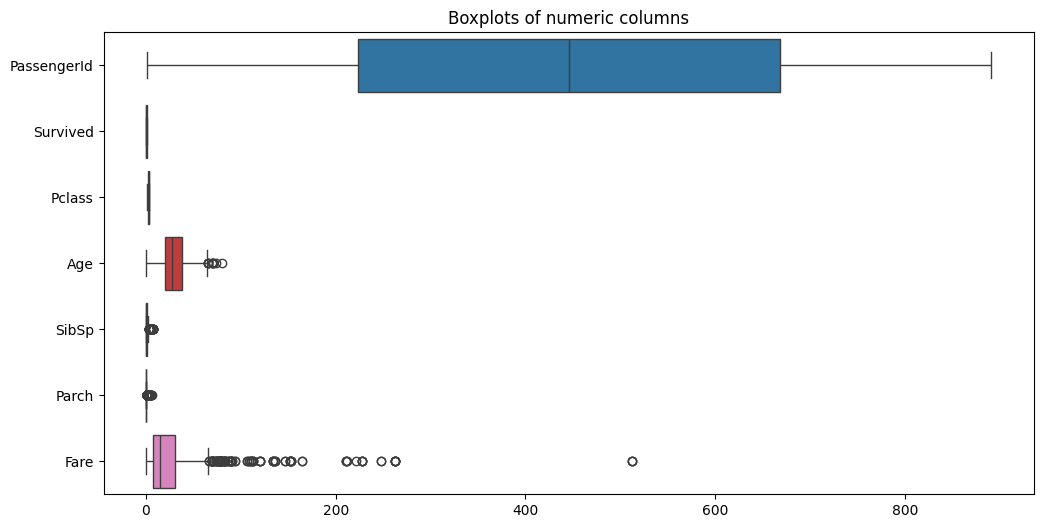

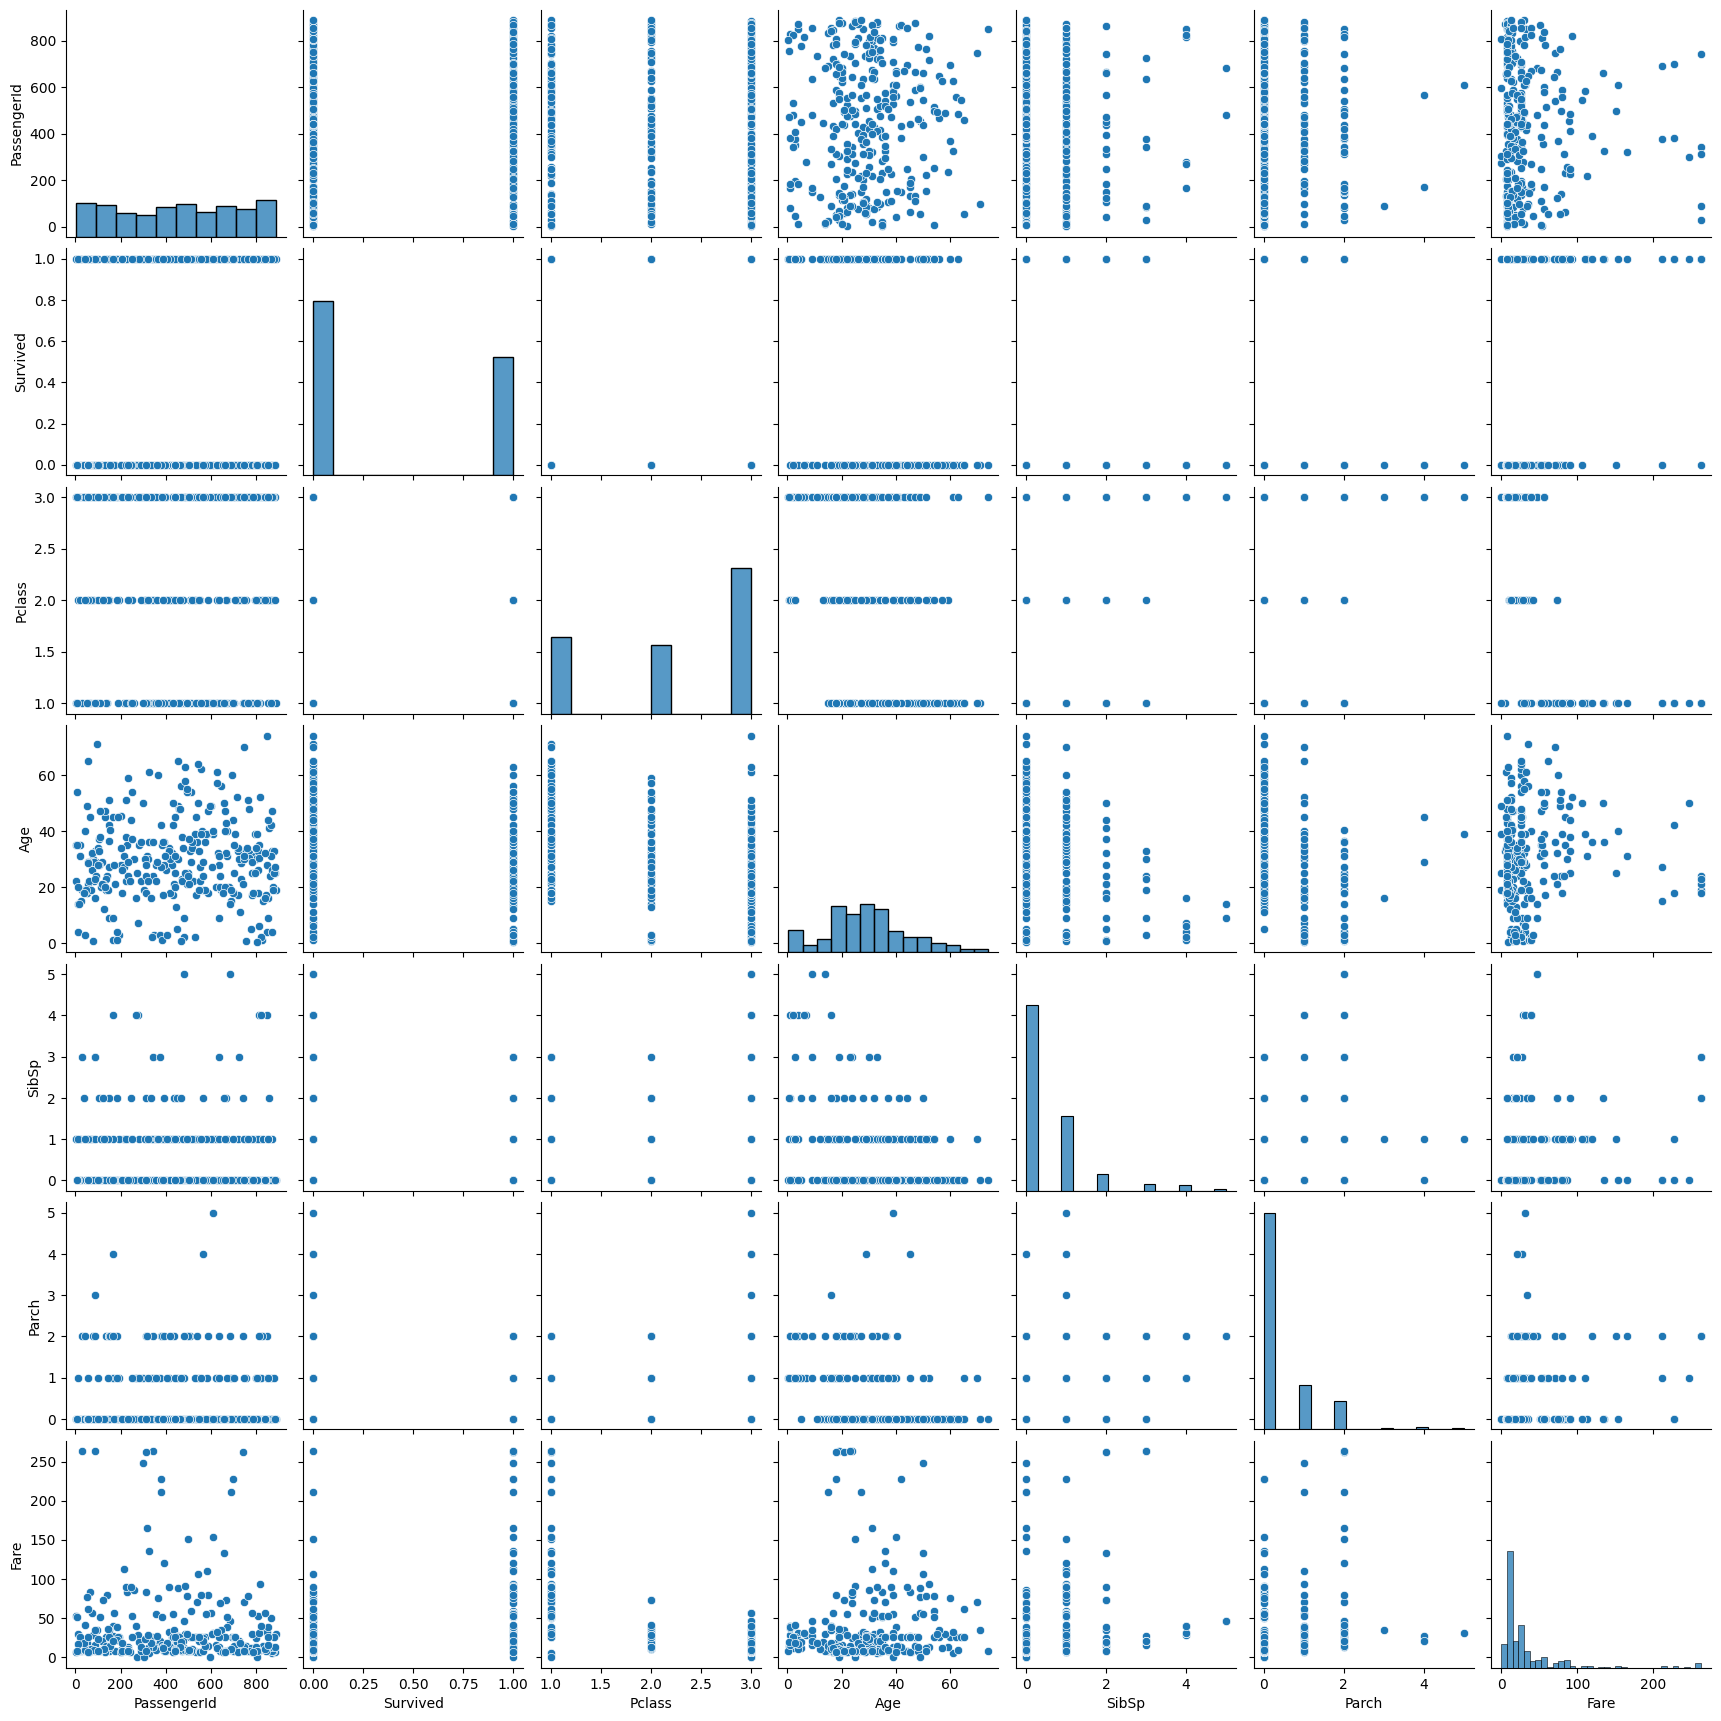

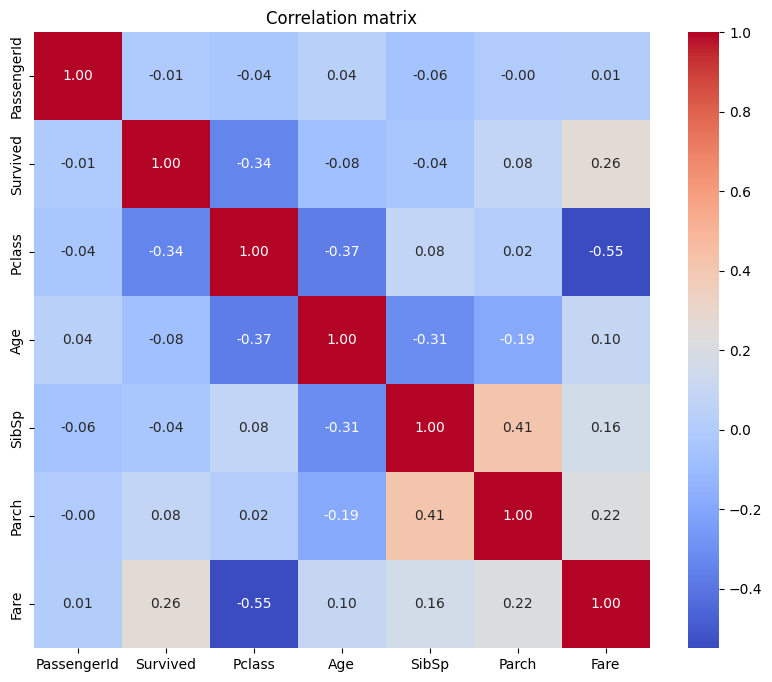

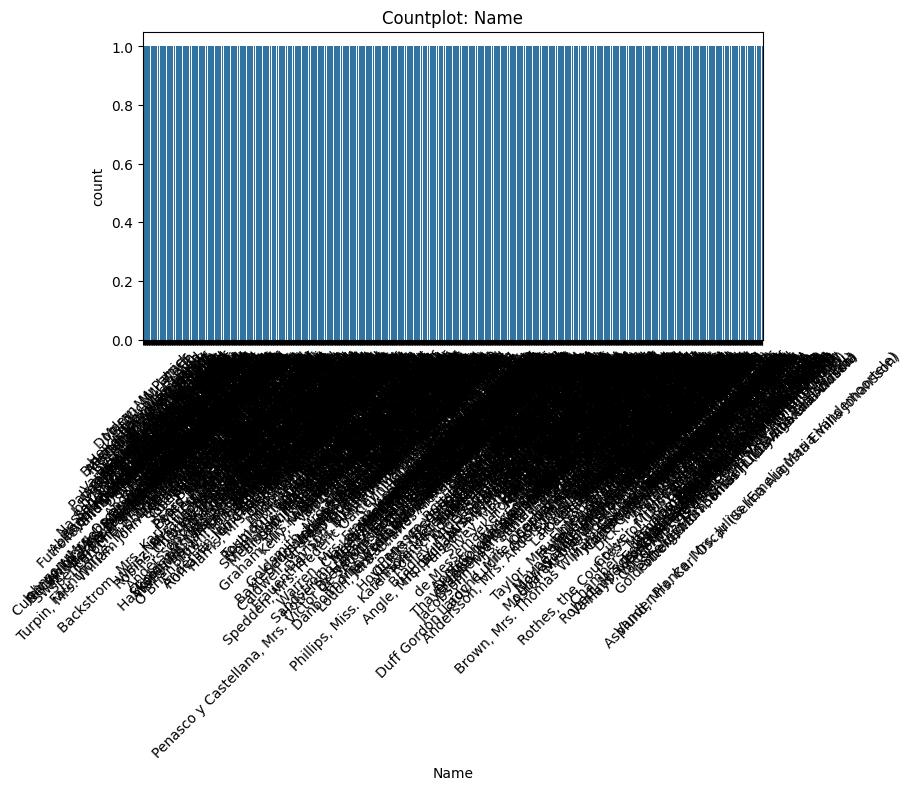

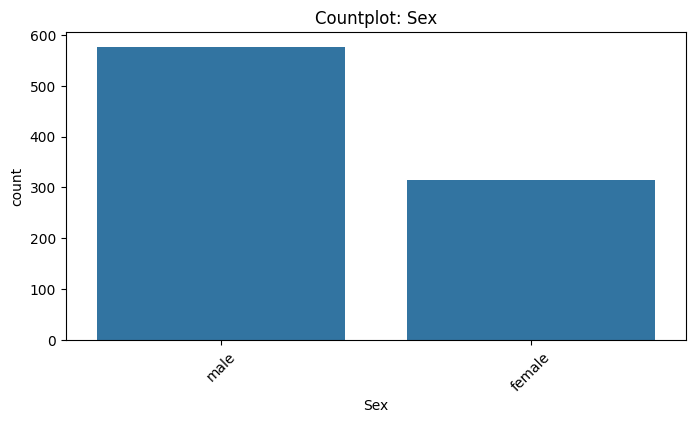

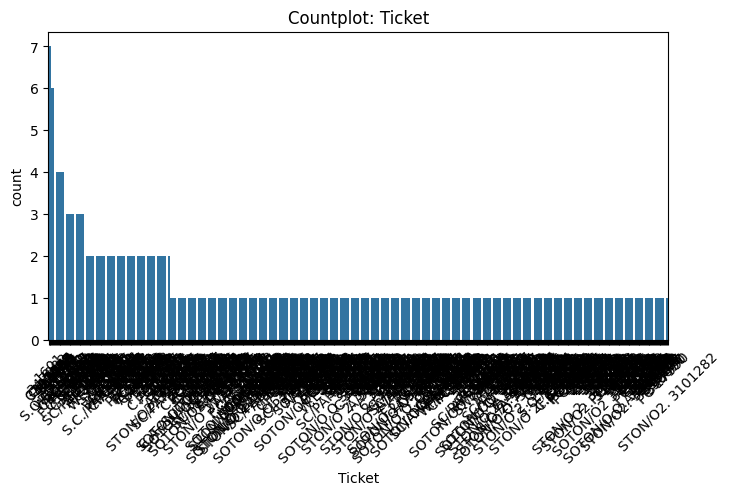

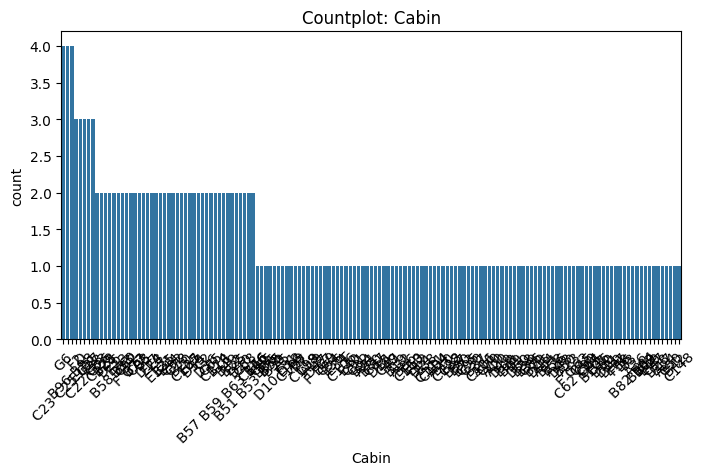

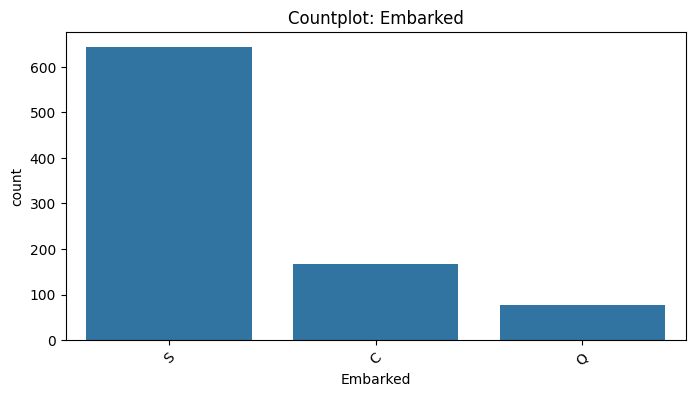

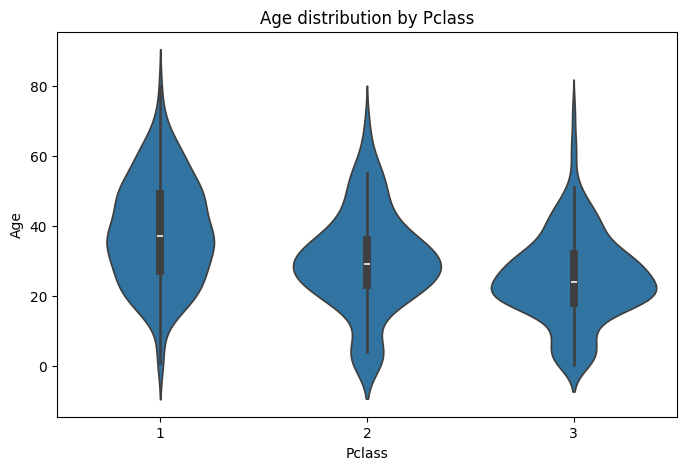

Duplicate rows: 0
Age: outliers count = 11
SibSp: outliers count = 46
Parch: outliers count = 213
Fare: outliers count = 116
Overall survival rate: 0.3838383838383838


,Survived
Sex,
female,0.742038
male,0.188908


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


/tmp/ipython-input-183682863.py:137: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Survived
age_bin,
"(0, 12]",0.579710
"(12, 20]",0.381818
"(20, 40]",0.397403
"(40, 60]",0.390625
"(60, 120]",0.227273


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install extras (Colab already has pandas, matplotlib, seaborn)
!pip install plotly --quiet

# Upload a file from your computer (runs a file picker)
from google.colab import files
uploaded = files.upload()                # choose your CSV (e.g. Titanic-Dataset.csv)
csv_name = list(uploaded.keys())[0]
print("Uploaded:", csv_name)

# OR: if you prefer Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# csv_name = '/content/drive/MyDrive/path/to/your.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 160)

df = pd.read_csv(csv_name)
print("Shape:", df.shape)
df.head()
# Structure + types
df.info()

# Summary stats (numeric + object)
display(df.describe(include='all').T)

# Missing values overview
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=['missing_count','missing_pct']).head(30)
num = df.select_dtypes(include=[np.number])
num_stats = pd.DataFrame({
    'count': num.count(),
    'mean': num.mean(),
    'median': num.median(),
    'std': num.std(),
    'min': num.min(),
    'max': num.max(),
    'skew': num.skew()
})
num_stats.T
cat = df.select_dtypes(include=['object','category'])
for c in cat.columns:
    print(f"\n--- {c} (unique={df[c].nunique()}) ---")
    print(df[c].value_counts(dropna=False).head(10))
# automatic histograms
num_cols = num.columns.tolist()
df[num_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplots of numeric columns')
plt.show()

# Individual column boxplot example:
# for c in num_cols:
#     sns.boxplot(x=df[c])
#     plt.title(c)
#     plt.show()
# If dataset is large, sample to speed up pairplot
# Pairplot SAFE version
num = df.select_dtypes(include=['number'])
sample_df = num.dropna()

# Take up to 300 rows only (avoid errors)
sample = sample_df.sample(n=min(300, len(sample_df)), random_state=1)

sns.pairplot(sample)
plt.show()

# Correlation heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation matrix")
plt.show()
# Countplot for categorical columns (first few)
for c in cat.columns[:6]:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=c, order=df[c].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Countplot: {c}')
    plt.show()

# If you have a numeric target (e.g., survival), view group means:
# df.groupby('CategoryColumn')['NumericTarget'].mean().sort_values().plot(kind='bar')
# Violin: numeric distribution by a categorical column (example: 'Pclass' or 'Survived' if Titanic)
if 'Pclass' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(8,5))
    sns.violinplot(data=df, x='Pclass', y='Age')
    plt.title('Age distribution by Pclass')
    plt.show()

# Interactive scatter with Plotly
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) >= 2:
    fig = px.scatter(df, x=num_cols[0], y=num_cols[1], hover_data=df.columns, title='Interactive scatter')
    fig.show()
# 1) Simple report of rows with missing values:
df[df.isnull().any(axis=1)].head()

# 2) Example imputations:
# numeric -> median
df['Age_filled'] = df['Age'].fillna(df['Age'].median()) if 'Age' in df.columns else None

# categorical -> mode
if 'Embarked' in df.columns:
    df['Embarked_filled'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Unusual values: numeric outside expected range (example)
for c in num_cols:
    q1, q3 = df[c].quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outs = df[(df[c] < lower) | (df[c] > upper)][c]
    if len(outs)>0:
        print(f"{c}: outliers count = {len(outs)}")
if 'Survived' in df.columns:
    print("Overall survival rate:", df['Survived'].mean())
    # survival by sex
    display(df.groupby('Sex')['Survived'].mean().sort_values(ascending=False))
    # survival by Pclass
    if 'Pclass' in df.columns:
        display(df.groupby('Pclass')['Survived'].mean().sort_index())
    # survival by Age bins
    df['age_bin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,120])
    display(df.groupby('age_bin')['Survived'].mean())
df.to_csv('eda_output_sample.csv', index=False)
from google.colab import files
files.download('eda_output_sample.csv')   # prompts download